# CelebA Validation EfficientNet

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
    
import mydata
import performance
from performance import PerformanceMeasure, PerformanceOptimisation
from bayes import BayesianRegression

# UTKFace

In [2]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg.csv", True)
efficientnet_save_file = f"{root}model/pickle/polynomial_model_efficientnet.pkl"
resnet_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
vgg_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"

In [3]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

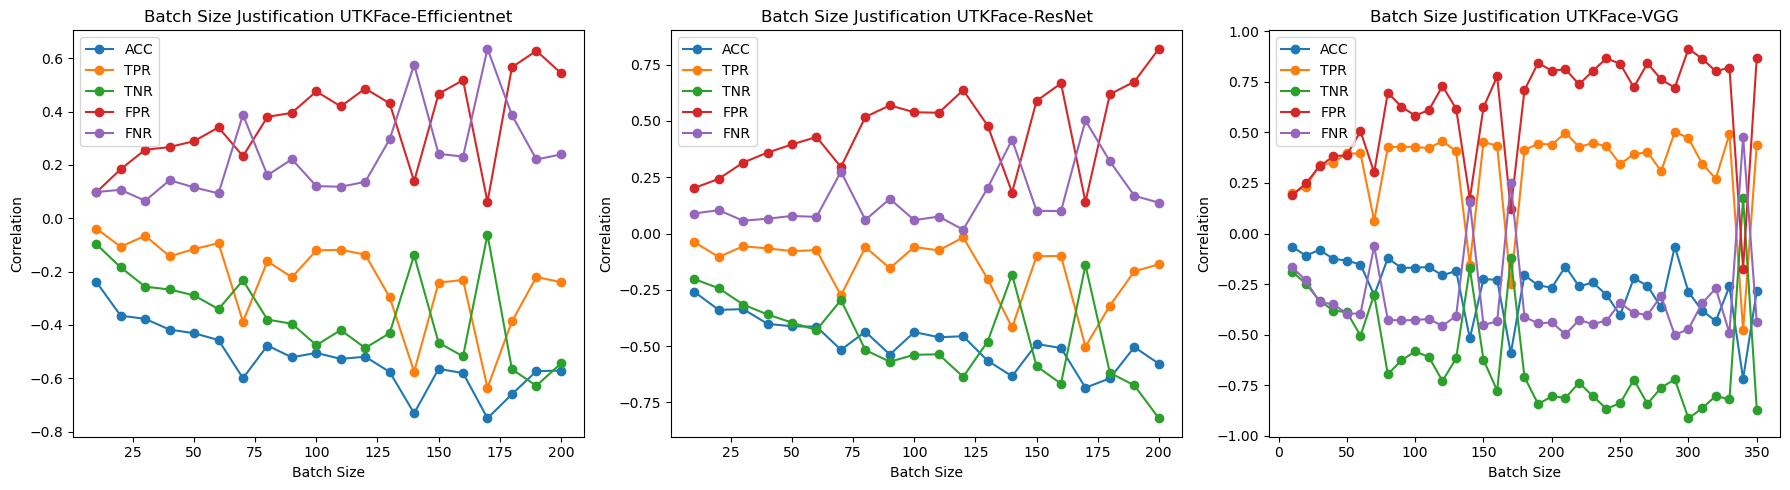

In [4]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [5]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=100)
po_resnet.check_optimal_batch_correlation(batch_size=100)
po_vgg.check_optimal_batch_correlation(batch_size=100)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.504996 -0.120574 -0.475942  0.475942  0.120574
ACC      -0.504996  1.000000  0.828357  0.260731 -0.260731 -0.828357
TPR      -0.120574  0.828357  1.000000 -0.255307  0.255307 -1.000000
TNR      -0.475942  0.260731 -0.255307  1.000000 -1.000000  0.255307
FPR       0.475942 -0.260731  0.255307 -1.000000  1.000000 -0.255307
FNR       0.120574 -0.828357 -1.000000  0.255307 -0.255307  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.437636 -0.059506 -0.538337  0.538337  0.059506
ACC      -0.437636  1.000000  0.814274  0.574545 -0.574545 -0.814274
TPR      -0.059506  0.814274  1.000000  0.076881 -0.076881 -1.000000
TNR      -0.538337  0.574545  0.076881  1.000000 -1.000000 -0.076881
FPR       0.538337 -0.574545 -0.076881 -1.000000  1.000000  0.076881
FNR       0.059506 -0.814274 -1.000000 -0.076881  0.076881  1.000000
          distance       ACC      

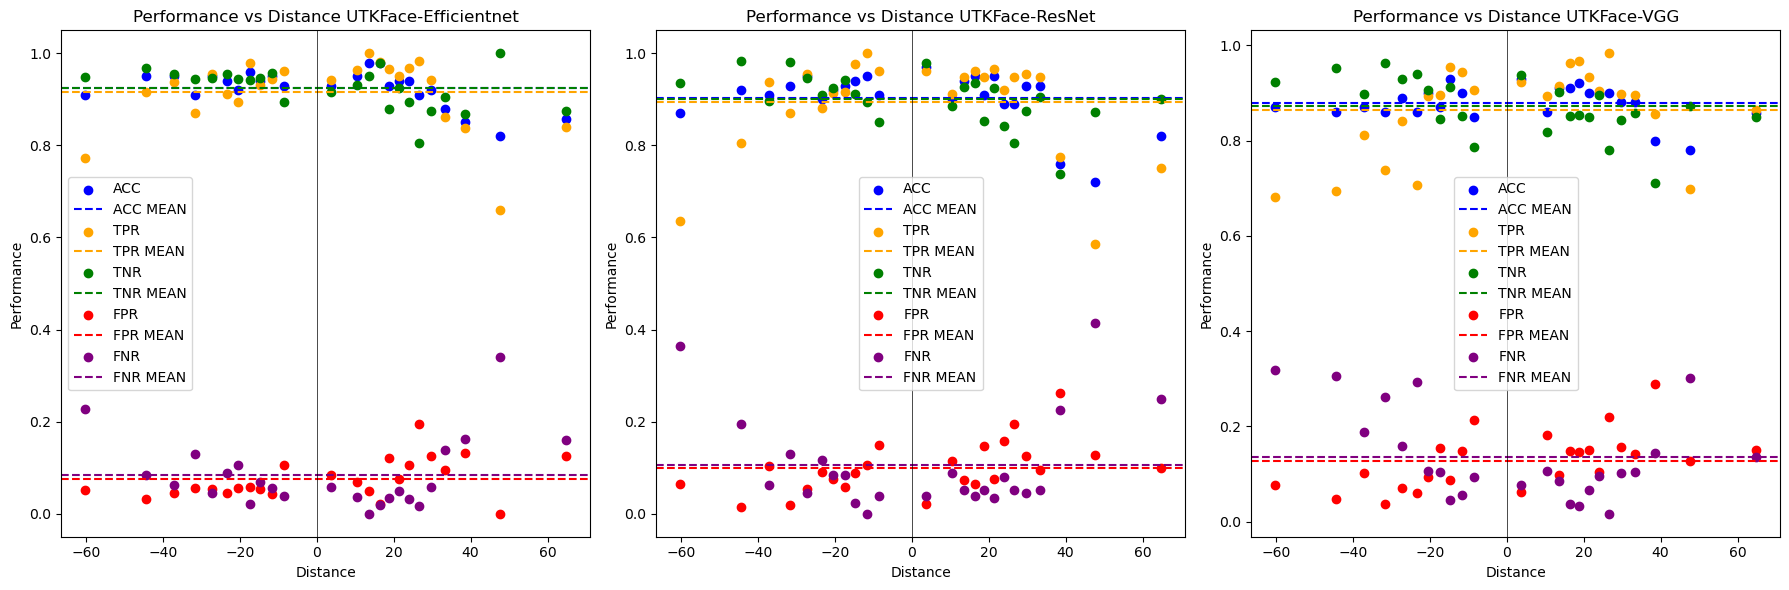

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

# Performance Estimation with Bayesian Regression

Modle saved
Modle saved
Modle saved


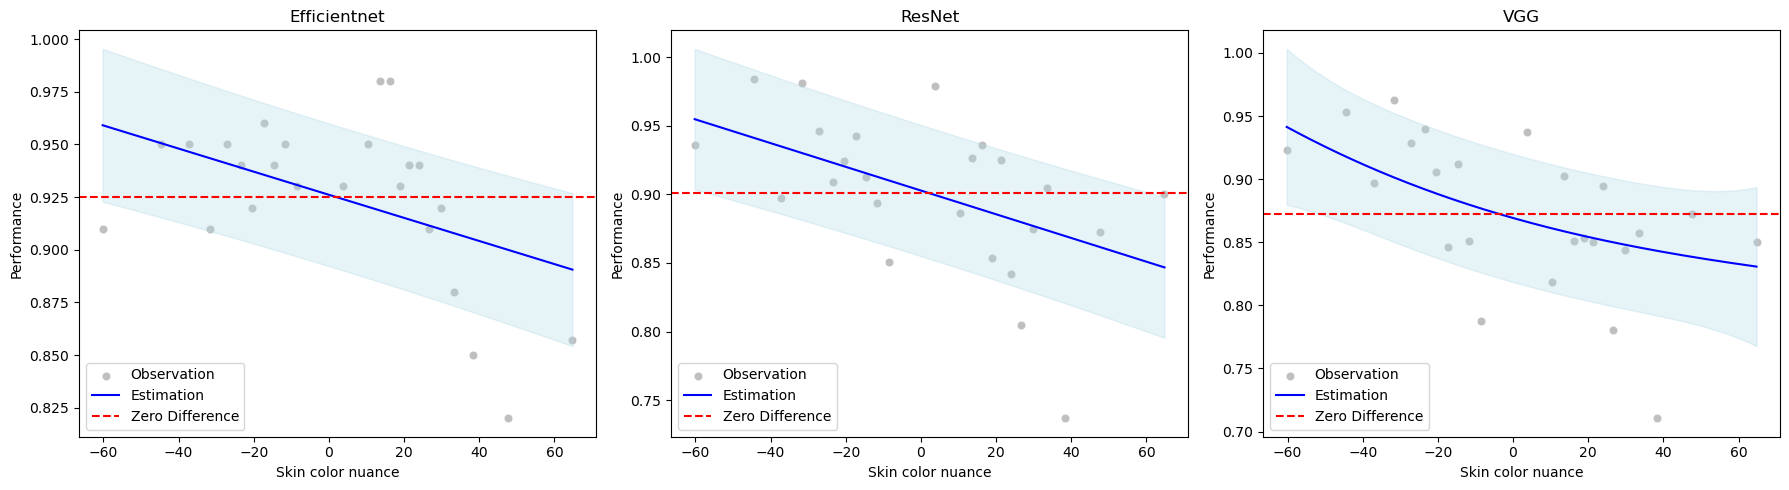

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

start = po_efficientnet.df_performance["distance"].max()
stop = po_efficientnet.df_performance["distance"].min()
num = 1000

X = po_efficientnet.df_performance["distance"]
y = po_efficientnet.df_performance["ACC"]

br = BayesianRegression()
br.fit(X, y, 1)
br.predict(start, stop, num)
br.display(ax[0], "Efficientnet")
br.save_model(efficientnet_save_file)

start = po_resnet.df_performance["distance"].max()
stop = po_resnet.df_performance["distance"].min()

X = po_resnet.df_performance["distance"]
y = po_resnet.df_performance["TNR"]

br = BayesianRegression()
br.fit(X, y, 1)
br.predict(start, stop, num)
br.display(ax[1], "ResNet")
br.save_model(resnet_save_file)

start = po_vgg.df_performance["distance"].max()
stop = po_vgg.df_performance["distance"].min()

X = po_vgg.df_performance["distance"]
y = po_vgg.df_performance["TNR"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[2], "VGG")
br.save_model(vgg_save_file)

plt.tight_layout()
plt.show()

# CelebA

In [8]:
db = "CelebA"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg.csv", True)
efficientnet_save_file = f"{root}model/pickle/polynomial_model_efficientnet.pkl"
resnet_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
vgg_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"

In [9]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

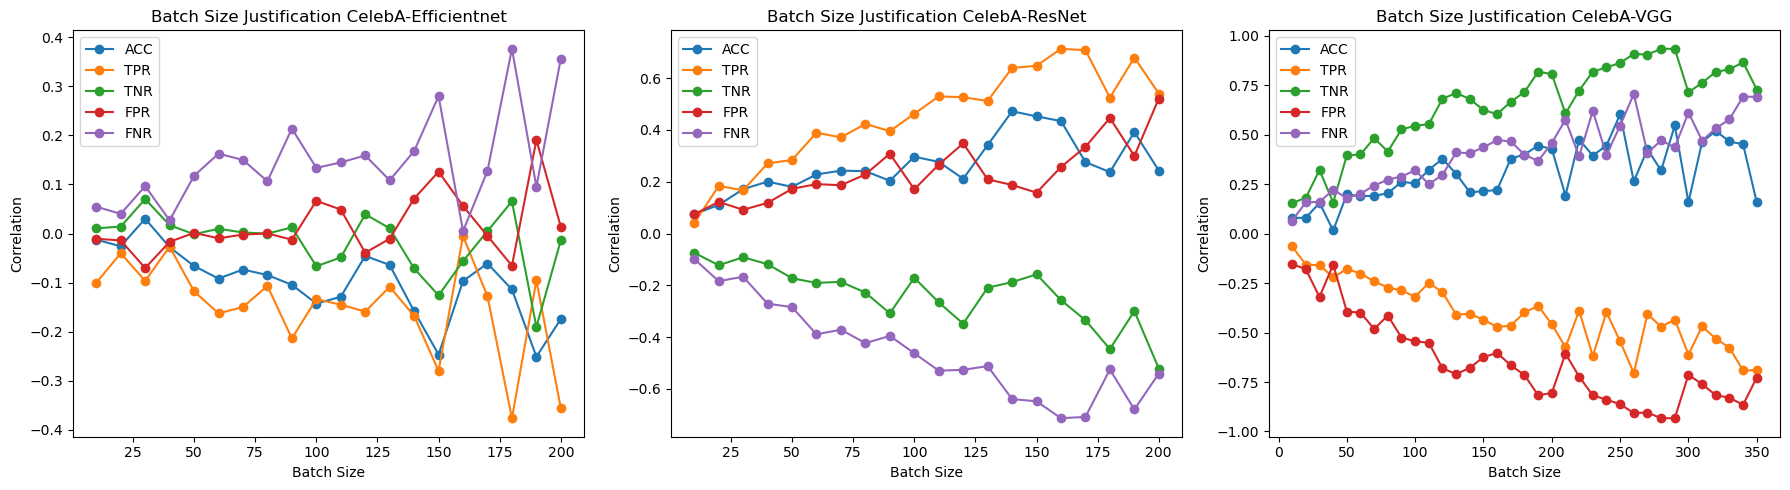

In [10]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [11]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=100)
po_resnet.check_optimal_batch_correlation(batch_size=100)
po_vgg.check_optimal_batch_correlation(batch_size=100)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.142589 -0.133610 -0.066581  0.066581  0.133610
ACC      -0.142589  1.000000  0.691453  0.874148 -0.874148 -0.691453
TPR      -0.133610  0.691453  1.000000  0.266790 -0.266790 -1.000000
TNR      -0.066581  0.874148  0.266790  1.000000 -1.000000 -0.266790
FPR       0.066581 -0.874148 -0.266790 -1.000000  1.000000  0.266790
FNR       0.133610 -0.691453 -1.000000 -0.266790  0.266790  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000  0.296532  0.462017 -0.170775  0.170775 -0.462017
ACC       0.296532  1.000000  0.848204  0.558101 -0.558101 -0.848204
TPR       0.462017  0.848204  1.000000  0.043351 -0.043351 -1.000000
TNR      -0.170775  0.558101  0.043351  1.000000 -1.000000 -0.043351
FPR       0.170775 -0.558101 -0.043351 -1.000000  1.000000  0.043351
FNR      -0.462017 -0.848204 -1.000000 -0.043351  0.043351  1.000000
          distance       ACC      

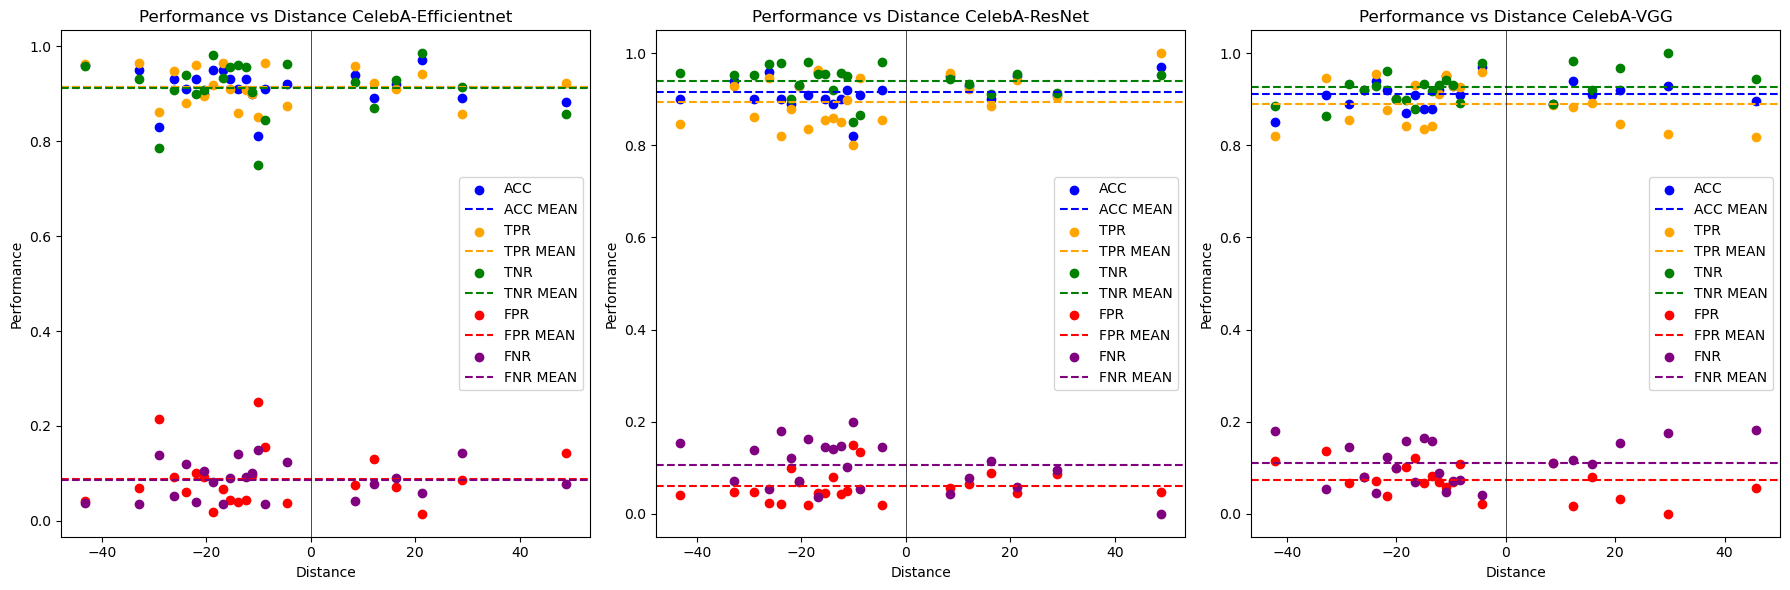

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

Modle saved
Modle saved
Modle saved


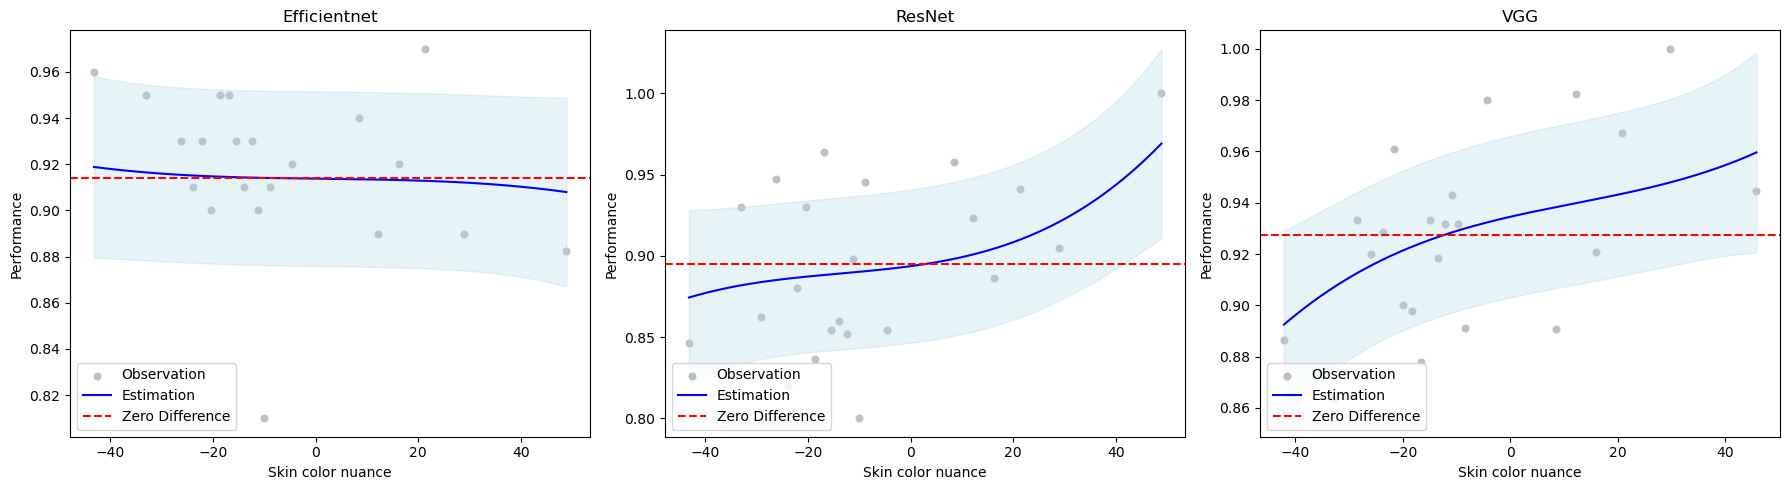

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

start = po_efficientnet.df_performance["distance"].max()
stop = po_efficientnet.df_performance["distance"].min()
num = 1000

X = po_efficientnet.df_performance["distance"]
y = po_efficientnet.df_performance["ACC"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[0], "Efficientnet")
br.save_model(efficientnet_save_file)

start = po_resnet.df_performance["distance"].max()
stop = po_resnet.df_performance["distance"].min()

X = po_resnet.df_performance["distance"]
y = po_resnet.df_performance["TPR"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[1], "ResNet")
br.save_model(resnet_save_file)

start = po_vgg.df_performance["distance"].max()
stop = po_vgg.df_performance["distance"].min()

X = po_vgg.df_performance["distance"]
y = po_vgg.df_performance["TNR"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[2], "VGG")
br.save_model(vgg_save_file)

plt.tight_layout()
plt.show()

# HAM10000

In [14]:
db = "HAM"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg.csv", True)
efficientnet_save_file = f"{root}model/pickle/polynomial_model_efficientnet.pkl"
resnet_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
vgg_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"

In [15]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

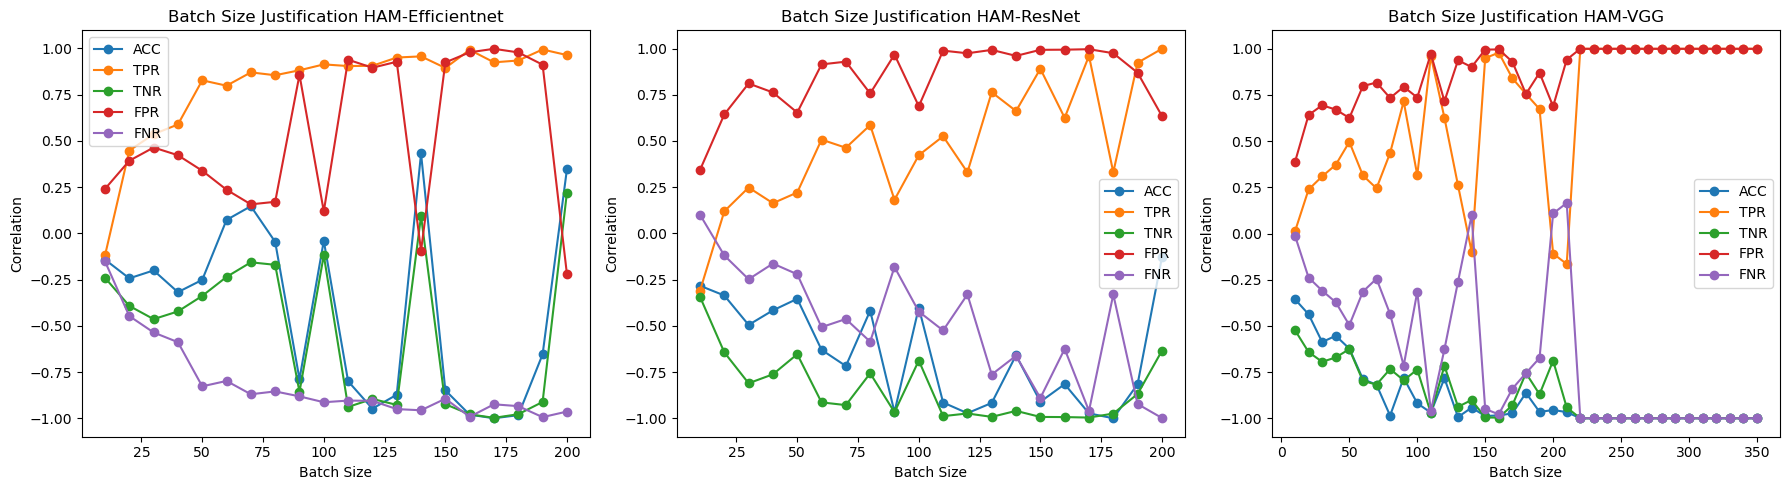

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [17]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=50)
po_resnet.check_optimal_batch_correlation(batch_size=50)
po_vgg.check_optimal_batch_correlation(batch_size=50)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.251507  0.827106 -0.338274  0.338274 -0.827106
ACC      -0.251507  1.000000 -0.138103  0.964366 -0.964366  0.138103
TPR       0.827106 -0.138103  1.000000 -0.339662  0.339662 -1.000000
TNR      -0.338274  0.964366 -0.339662  1.000000 -1.000000  0.339662
FPR       0.338274 -0.964366  0.339662 -1.000000  1.000000 -0.339662
FNR      -0.827106  0.138103 -1.000000  0.339662 -0.339662  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.353978  0.221101 -0.653480  0.653480 -0.221101
ACC      -0.353978  1.000000  0.603779  0.860154 -0.860154 -0.603779
TPR       0.221101  0.603779  1.000000  0.168322 -0.168322 -1.000000
TNR      -0.653480  0.860154  0.168322  1.000000 -1.000000 -0.168322
FPR       0.653480 -0.860154 -0.168322 -1.000000  1.000000  0.168322
FNR      -0.221101 -0.603779 -1.000000 -0.168322  0.168322  1.000000
          distance       ACC      

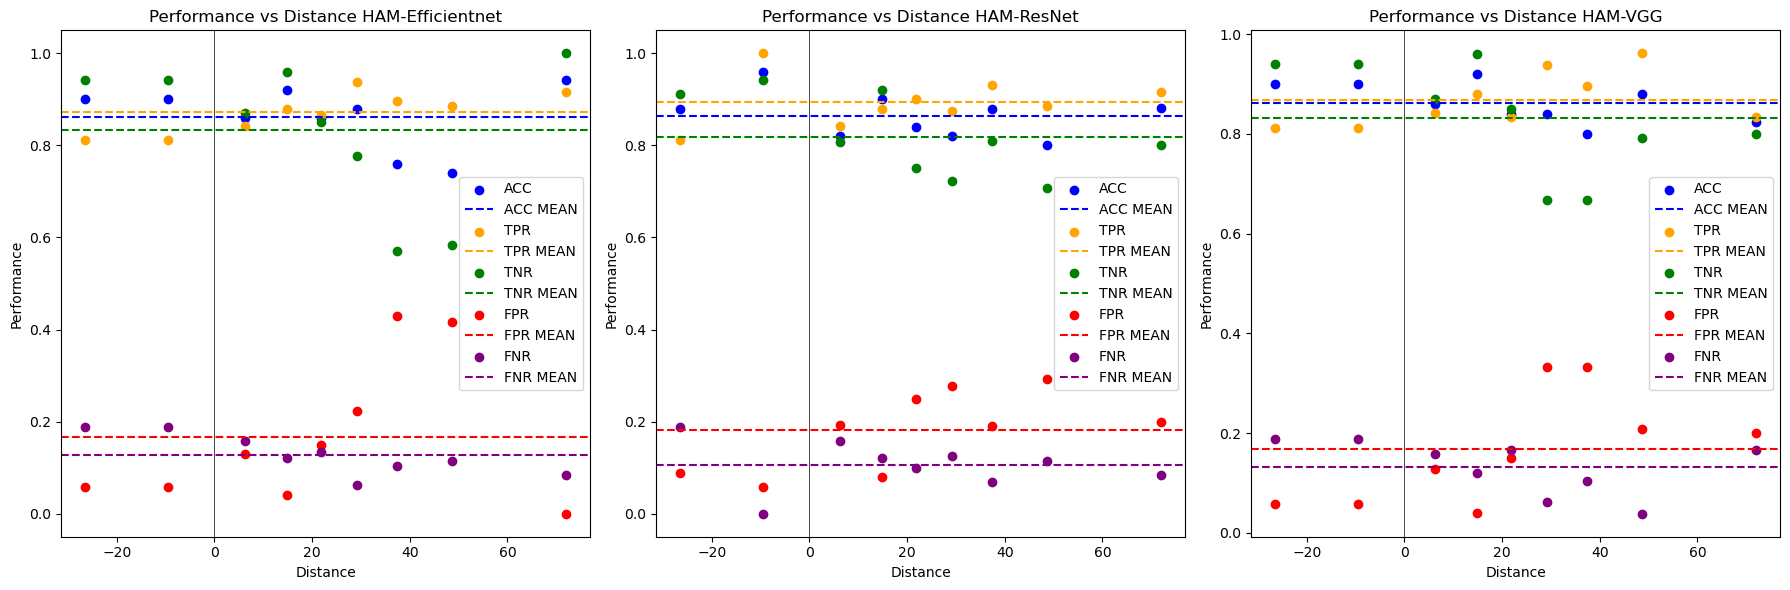

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

Modle saved
Modle saved
Modle saved


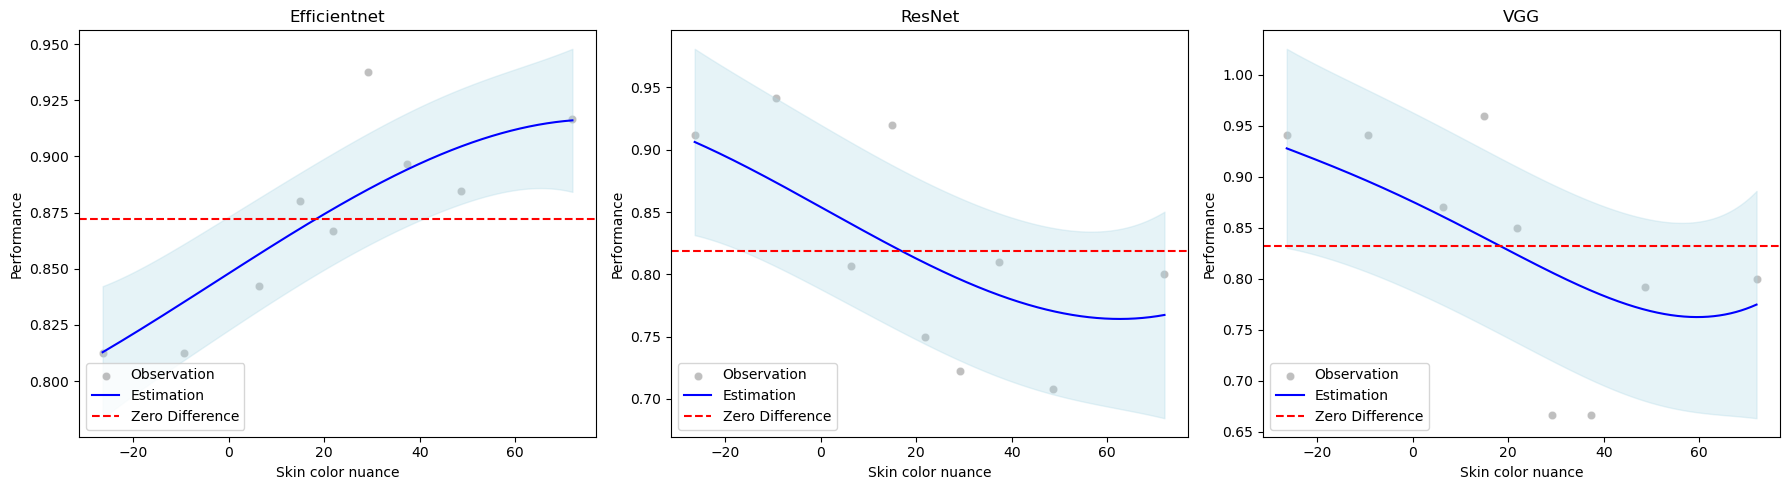

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

start = po_efficientnet.df_performance["distance"].max()
stop = po_efficientnet.df_performance["distance"].min()
num = 1000

X = po_efficientnet.df_performance["distance"]
y = po_efficientnet.df_performance["TPR"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[0], "Efficientnet")
br.save_model(efficientnet_save_file)

start = po_resnet.df_performance["distance"].max()
stop = po_resnet.df_performance["distance"].min()

X = po_resnet.df_performance["distance"]
y = po_resnet.df_performance["TNR"]

br = BayesianRegression()
br.fit(X, y, 3)
br.predict(start, stop, num)
br.display(ax[1], "ResNet")
br.save_model(resnet_save_file)

start = po_vgg.df_performance["distance"].max()
stop = po_vgg.df_performance["distance"].min()

X = po_vgg.df_performance["distance"]
y = po_vgg.df_performance["TNR"]

br = BayesianRegression()
br.fit(X, y, 4)
br.predict(start, stop, num)
br.display(ax[2], "VGG")
br.save_model(vgg_save_file)

plt.tight_layout()
plt.show()